## Covid-Variants-SQL-Analysis

In [91]:
# Install required packages
!pip install numpy pandas matplotlib seaborn

## Import required packages and Load the dataset

In [98]:
# Import required packages
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the covid variants csv dataset into a dataframe
df=pd.read_csv("covid_variants.csv")

# Display the dataframe
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,6/07/2020,Alpha,0,0.0,3
1,Angola,6/07/2020,B.1.1.277,0,0.0,3
2,Angola,6/07/2020,B.1.1.302,0,0.0,3
3,Angola,6/07/2020,B.1.1.519,0,0.0,3
4,Angola,6/07/2020,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,1/11/2021,Omicron,0,0.0,6
100412,Zimbabwe,1/11/2021,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,1/11/2021,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,1/11/2021,others,0,0.0,6


## Load the Data into SQL

In [85]:
# Create an in-memory SQlite database and Load data into SQL table
conn=sqlite3.connect(":memory:") # created a temporary database in memory

# Save the dataframe to SQL memory created
df.to_sql("covid_variants",conn,index=False,if_exists="replace") #

100416

## SQL Query-Top Variant Globally

In [87]:
# SQL Query to find the total number of sequences for each variants

query= """
SELECT variant, SUM(num_sequences) AS total_sequences
FROM covid_variants
GROUP BY variant
ORDER BY total_sequences DESC;
"""
result_df=pd.read_sql_query(query,conn)
result_df


,variant,total_sequences
0,Delta,3834100
1,Alpha,1132595
2,non_who,931098
3,others,642603
4,B.1.177,170457
5,Omicron,115538
6,Gamma,115156
7,Epsilon,66127
8,Iota,42905
9,Beta,40514


## Bar plot of Total Sequences V/S Variants

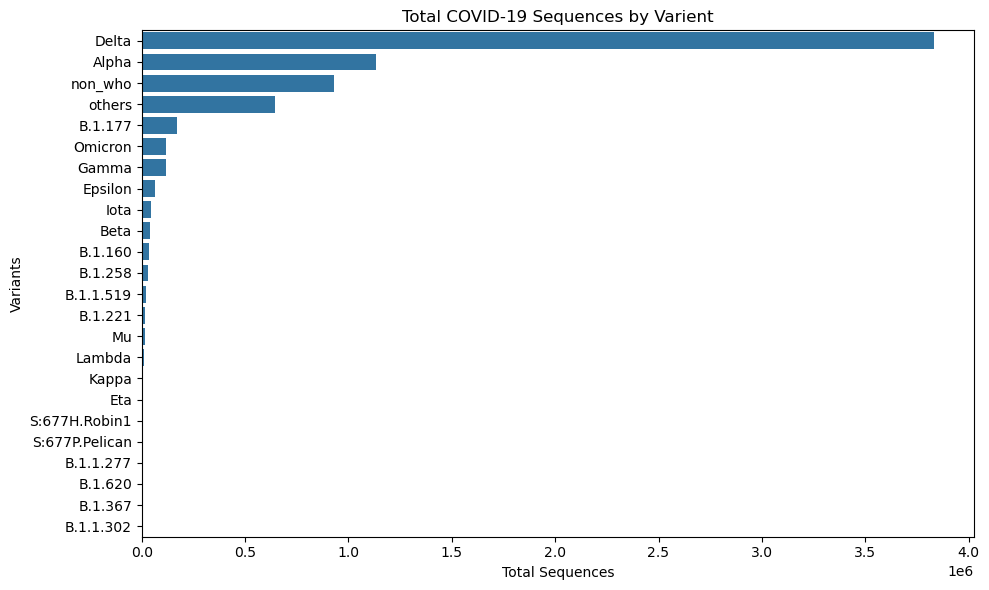

In [95]:
# Visualisation using Seaborn

plt.figure(figsize=(10,6))
sns.barplot(result_df,x="total_sequences",y="variant")
plt.title("Total COVID-19 Sequences by Varient")
plt.xlabel("Total Sequences")
plt.ylabel("Variants")

plt.tight_layout()
plt.show()